<a href="https://colab.research.google.com/github/shinmiura/diveintocode-ml/blob/master/%E4%BD%8F%E5%AE%85%E4%BE%A1%E6%A0%BC%E3%81%AE%E4%BA%88%E6%B8%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

テキストの目的

・教師あり学習（回帰問題）の概観を知る

・scikit-laernを使い回帰を行えるようにする

・手法の簡単な比較をする


どのように学ぶか

定番のデータセットを通じて、回帰問題を解く流れやライブラリの使い方を学びます。

**2.住宅価格の回帰**

Week3で使用したアイオワ州エイムズ市の住宅価格データセットを使い、回帰問題を解く練習をします。


79種類の特徴量（説明変数）を活用し、住宅価格の数値を推測する問題が設定できます。こういった連続値のものを推測する問題を回帰問題と呼びます。

今回使う手法の一覧

scikit-laernを使い以下の手法で学習と推定を行っていきます。それぞれの手法についての詳細は今の段階では扱いません。ライブラリを使えばどれも気軽に利用できることや、手法毎の結果に違いがあることを簡単に見ていきます。



・線形回帰

・SVM

・決定木

・ランダムフォレスト

分類問題と回帰問題の両方で使える手法と、そうではない手法が存在します。

**3.データセットの準備**

Week3同様にKaggleからデータセットをダウンロードしてください。train.csvのみを使用します。


House Prices: Advanced Regression Techniques | Kaggle



In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

matplotlib.style.use('ggplot')

**4.回帰問題の流れ**

回帰問題の流れは分類問題と基本的には同じですから、課題1のように細かい説明は行いません。

練習のための準備

このデータセットには79種類の特徴量（目的変数）がありますが、Week3で探索して分かったようにさまざまなタイプのデータが含まれています。これをどう前処理するかということは機械学習において重要な箇所ですが、今回は回帰問題の学習や評価の練習を優先するため、説明変数(特徴量)GrLivAreaとYearBuiltの2つだけを利用することにします。

【問題1】練習のために特徴量の選択

データセットを読み込んだ後、説明変数GrLivAreaとYearBuilt、目的変数SalePriceをそれぞれ抜き出してください。

In [2]:
# データセットの読み込み
dataset = pd.read_csv("/content/drive/MyDrive/DIC/train.csv")

In [3]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# 説明変数GrLivAreaとYearBuilt、目的変数SalePriceをそれぞれ抜き出し
df = dataset.loc[:, ['GrLivArea', 'YearBuilt', 'SalePrice']]
df

,GrLivArea,YearBuilt,SalePrice
0,1710,2003,208500
1,1262,1976,181500
2,1786,2001,223500
3,1717,1915,140000
4,2198,2000,250000
...,...,...,...
1455,1647,1999,175000
1456,2073,1978,210000
1457,2340,1941,266500
1458,1078,1950,142125


【問題2】線形回帰による推定と評価

データを簡単に分析、前処理し、 線形回帰 による学習、推定、評価、可視化までの一連の流れを作成・実行してください。


sklearn.linear_model.LinearRegression — scikit-learn 0.21.3 documentation


評価のための指標値は回帰問題では 平均二乗誤差（Mean Squared Error, MSE） を使うことが一般的です。


sklearn.metrics.mean_squared_error — scikit-learn 0.21.3 documentation


可視化は横軸にある特徴量、縦軸に推測した住宅価格といった方法で行えます。
scatterを用いて、実際のデータと予測結果を比較できるグラフを作りましょう。



In [5]:
# 各特徴量がどういったものかを見る。（数値データか文字データなど）
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   GrLivArea  1460 non-null   int64
 1   YearBuilt  1460 non-null   int64
 2   SalePrice  1460 non-null   int64
dtypes: int64(3)
memory usage: 34.3 KB


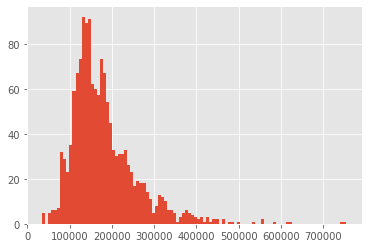

In [6]:
# 分布の確認
df['SalePrice'].hist(bins = 100)

In [7]:
# 要約統計量を出力する(特徴量の平均値と標準偏差、四分位数を一度に表示させる。)
df.describe()

,GrLivArea,YearBuilt,SalePrice
count,1460.000000,1460.000000,1460.000000
mean,1515.463699,1971.267808,180921.195890
std,525.480383,30.202904,79442.502883
min,334.000000,1872.000000,34900.000000
25%,1129.500000,1954.000000,129975.000000
50%,1464.000000,1973.000000,163000.000000
75%,1776.750000,2000.000000,214000.000000
max,5642.000000,2010.000000,755000.000000


In [8]:
# データ分割用のライブラリ
from sklearn.model_selection import train_test_split

In [9]:
X = df.loc[:, ('GrLivArea', 'YearBuilt')]
y = df.loc[:, 'SalePrice']

In [10]:
npX = X.to_numpy()
display(npX)

array([[1710, 2003],
       [1262, 1976],
       [1786, 2001],
       ...,
       [2340, 1941],
       [1078, 1950],
       [1256, 1965]])

In [11]:
npy = y.to_numpy()
display(npy)

array([208500, 181500, 223500, ..., 266500, 142125, 147500])

In [12]:
# 分割
X_train, X_test, y_train, y_test = train_test_split(npX, npy, test_size=0.30, random_state=1234)

In [13]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1022, 2)
(438, 2)
(1022,)
(438,)


In [14]:
# 標準化
# ライブラリの読み込み
from sklearn.preprocessing import StandardScaler

In [15]:
# StandardScalerをscalerという呼び名で読み込み
scaler = StandardScaler()

In [16]:
X_train_std = scaler.fit_transform(X_train)
X_train_std

array([[-0.30748725,  0.42834389],
       [ 0.17163404,  0.165795  ],
       [ 0.30799934,  1.08471612],
       ...,
       [ 0.47937734,  0.98626029],
       [-0.10478209, -0.55621445],
       [ 0.24718779,  0.88780445]])

In [17]:
X_test_std = scaler.fit_transform(X_test)
X_test_std

array([[ 1.03284188e+00, -2.37588491e-01],
       [ 2.52456491e+00, -4.64040021e-04],
       [ 2.31240691e-02,  1.11740837e+00],
       [-9.32575919e-01, -7.45712313e-01],
       [-1.01176696e-02,  1.15128329e+00],
       [ 3.57619065e-01,  8.12534076e-01],
       [ 7.27433408e-01,  8.80283919e-01],
       [-1.04476679e+00, -1.55871043e+00],
       [ 1.62288275e+00,  9.14158841e-01],
       [-8.66092442e-01,  1.11740837e+00],
       [-8.99334181e-01, -5.76337706e-01],
       [-1.30618973e-01,  1.68910568e-01],
       [ 1.43625372e-01, -9.15086921e-01],
       [ 1.81022328e-01, -1.49096059e+00],
       [ 1.32578471e+00,  6.43159469e-01],
       [ 1.49858198e-01,  1.11740837e+00],
       [-9.94548425e-02,  9.14158841e-01],
       [-2.51120275e-01,  1.11740837e+00],
       [-1.23590679e+00, -1.69838648e-01],
       [-8.37005921e-01, -2.03713569e-01],
       [-6.93650922e-01, -3.73088177e-01],
       [-4.52648316e-01, -8.13462156e-01],
       [-9.69972875e-01, -2.10070917e+00],
       [-1.

In [18]:
# 線形回帰
# ライブラリのインポート
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [19]:
target_col = 'SalePrice'
feature_cols = ['GrLivArea', 'YearBuilt']
print(df[target_col].head())
print(df[feature_cols].head())

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64
   GrLivArea  YearBuilt
0       1710       2003
1       1262       1976
2       1786       2001
3       1717       1915
4       2198       2000


In [20]:
# 線形回帰の学習
lm = LinearRegression()
lm.fit(X_train_std, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
# 線形回帰の推定
y_pred =lm.predict(X_test_std)

In [22]:
# 線形回帰の評価
lm_mse = mean_squared_error(y_test, y_pred)
print('MSE:{}'.format(lm_mse))
print('RMSE:{}'.format(np.sqrt(lm_mse)))

MSE:1765157813.9374583
RMSE:42013.781238272975


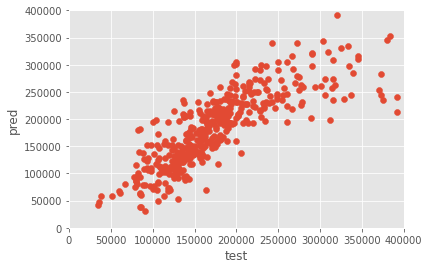

In [23]:
# 線形回帰の可視化
plt.xlim(0, 400000)
plt.ylim(0, 400000)
plt.scatter(y_test, y_pred)
plt.xlabel('test')
plt.ylabel('pred')
plt.grid(True)
plt.show()

【問題3】手法の比較

以下のすべての手法について学習・推定・評価・可視化を行ってください。そして、指標値を１つの表にまとめてください。その表と可視化した図を利用して結果を簡単に考察してください。どの手法がどの指標値が良かったかや、どういった図になっていたかを述べてください。


・線形回帰

・SVM

・決定木

・ランダムフォレスト

公式ドキュメントへのリンクは以下です。本来はパラメータチューニングを行いますが、まずはデフォルトの値で実行しましょう。


・sklearn.linear_model.LinearRegression — scikit-learn 0.21.3 documentation

・sklearn.svm.SVR — scikit-learn 0.21.3 documentation

・sklearn.tree.DecisionTreeRegressor — scikit-learn 0.21.3 documentation

・sklearn.ensemble.RandomForestRegressor — scikit-learn 0.21.3 documentation

SVM、決定木、ランダムフォレストは分類問題でも使用した手法ですが、回帰問題用のライブラリはそれぞれ専用のものに分かれています。



In [24]:
# SVMの場合
# SVRのライブラリの読み込み
from sklearn.svm import SVR
# SVMで学習
sv = SVR().fit(X_train_std, y_train)
# SVMで予測
sv_y_pred = sv.predict(X_test_std)
sv_y_pred

array([162105.84318199, 162077.18298027, 162213.88541263, 161785.67016748,
       162210.48058964, 162232.02263566, 162255.95010971, 161833.27937347,
       162192.43756899, 162058.52398578, 161793.10418081, 162031.4594766 ,
       161901.77352631, 161895.27322745, 162213.73654153, 162230.38783209,
       162178.3849055 , 162169.5095549 , 161821.74871903, 161835.69542383,
       161827.77027763, 161818.74911206, 161892.95334159, 161788.05845396,
       162236.1801622 , 162215.18919393, 162116.31209684, 162201.81186424,
       162258.8935351 , 161912.09805955, 162198.86184703, 161791.6267339 ,
       162160.83931584, 161891.40825927, 161854.25085149, 162035.06711184,
       161881.15218454, 162223.90185917, 161815.84604029, 162086.80764686,
       161911.1470237 , 161852.00506683, 161815.00518195, 162211.02173251,
       161916.81024191, 161829.18899124, 162024.97182313, 161860.8837727 ,
       161828.19165855, 162006.84538072, 162068.65000694, 162257.84621085,
       161897.97024479, 1

In [25]:
# SVMの評価
sv_mse = mean_squared_error(y_test, sv_y_pred)
print('MSE:{}'.format(sv_mse))
print('RMSE:{}'.format(np.sqrt(sv_mse)))

MSE:5210408041.65456
RMSE:72183.156218432


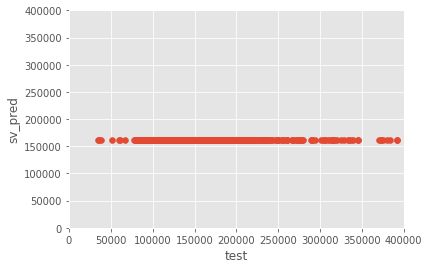

In [26]:
# SVMの可視化
plt.xlim(0, 400000)
plt.ylim(0, 400000)
plt.scatter(y_test, sv_y_pred)
plt.xlabel('test')
plt.ylabel('sv_pred')
plt.grid(True)
plt.show()

In [37]:
# 決定木の場合
# ライブラリのインポート
from sklearn.tree import DecisionTreeRegressor

In [38]:
# 決定木の学習
dt = DecisionTreeRegressor(max_depth = 10, random_state = 1234)
dt.fit(X_train_std, y_train)
# 決定木の推定
dt_y_pred =dt.predict(X_test_std)

In [39]:
# 決定木の評価
dt_mse = mean_squared_error(y_test, dt_y_pred)
print('MSE:{}'.format(dt_mse))
print('RMSE:{}'.format(np.sqrt(dt_mse)))

MSE:3129670246.178622
RMSE:55943.4557940303


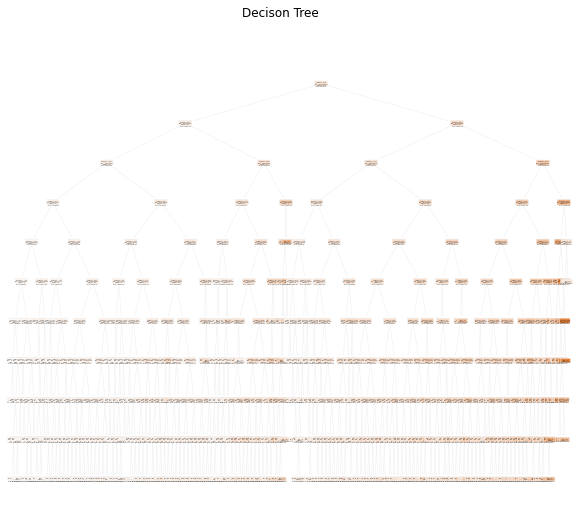

In [40]:
# 決定木の可視化
from sklearn.tree import plot_tree
fig = plt.figure(figsize= (10, 8))
ax = fig.add_subplot()
ax = plot_tree(dt, feature_names = feature_cols, filled = True, rounded = True)

plt.suptitle('Decison Tree')
plt.show()

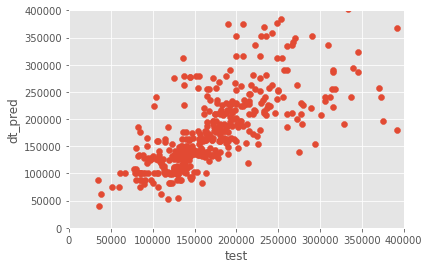

In [41]:
# 決定木の可視化
plt.xlim(0, 400000)
plt.ylim(0, 400000)
plt.scatter(y_test, dt_y_pred)
plt.xlabel('test')
plt.ylabel('dt_pred')
plt.grid(True)
plt.show()

In [42]:
# ランダムフォレスト
# ライブラリのインポート
from sklearn.ensemble import RandomForestRegressor

In [43]:
# ランダムフォレストの学習
rf = RandomForestRegressor(random_state = 1234)
rf.fit(X_train_std, y_train)
# ランダムフォレストの推定
rf_y_pred =rf.predict(X_test_std)

In [44]:
# ランダムフォレストの評価
rf_mse = mean_squared_error(y_test, rf_y_pred)
print('MSE:{}'.format(rf_mse))
print('RMSE:{}'.format(np.sqrt(rf_mse)))

MSE:2009786683.9873726
RMSE:44830.64447437013


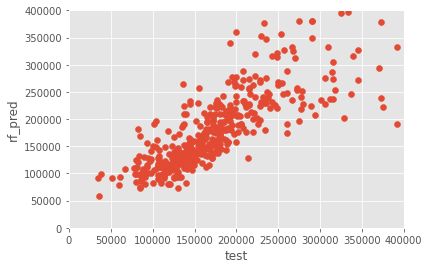

In [45]:
# ランダムフォレストの可視化
plt.xlim(0, 400000)
plt.ylim(0, 400000)
plt.scatter(y_test, rf_y_pred)
plt.xlabel('test')
plt.ylabel('rf_pred')
plt.grid(True)
plt.show()

【問題4】（アドバンス課題）他の特徴量も使用しての学習

ここまでは練習のために2つの特徴量だけを使いましたが、他の特徴量を加えるとどのようになるか検証してください。どう選択・加工するかにはデータ分析が重要になってきます。


KaggleのNotebooksも参考にできます。


House Prices: Advanced Regression Techniques | Kaggle